In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
np.set_printoptions(suppress=True)

In [15]:
Fifa19=pd.read_pickle('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/fifa19_New_Ml.pkl')

In [40]:
Fifa19.head(50)

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New
158,26,1,1.0,3.0,2.0,8,6,0,8,4.0,...,85.0,87.0,82.0,16.0,15.0,13.0,15.0,10.0,40.5,22.5
231,34,1,1.0,3.0,2.0,2,6,0,18,3.0,...,77.0,85.0,84.0,18.0,12.0,14.0,11.0,18.0,12.4,6.5
422,26,1,1.0,3.0,2.0,8,6,0,18,4.0,...,82.0,82.0,76.0,9.0,13.0,15.0,9.0,15.0,30.6,15.5
424,22,1,1.0,3.0,3.0,8,3,0,17,2.0,...,83.0,80.0,81.0,9.0,7.0,15.0,7.0,15.0,33.3,17.5
565,30,1,1.0,3.0,2.0,8,6,0,9,14.0,...,82.0,84.0,77.0,15.0,7.0,16.0,9.0,8.0,18.1,9.5
567,34,1,1.0,3.0,3.0,2,6,0,17,2.0,...,79.0,78.0,76.0,15.0,13.0,12.0,10.0,15.0,6.8,3.6
574,24,1,1.0,3.0,4.0,2,6,0,12,21.0,...,54.0,34.0,33.0,15.0,11.0,13.0,6.0,12.0,33.7,15.5
579,22,1,1.0,3.0,3.0,2,6,0,24,7.0,...,65.0,34.0,30.0,11.0,10.0,9.0,13.0,7.0,28,17.5
585,24,1,1.0,3.0,3.0,2,6,0,0,4.0,...,20.0,50.0,25.0,13.0,15.0,12.0,13.0,14.0,28.4,16
594,22,1,1.0,3.0,3.0,6,6,0,19,25.0,...,79.0,80.0,71.0,11.0,13.0,8.0,14.0,10.0,27.2,14.5


In [19]:
## Treatoing outliers

Q1=Fifa19.quantile(0.25)
Q3=Fifa19.quantile(0.75)
IQR=Q3-Q1
print(IQR)




Age                         7.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 1.0
                           ... 
GKDiving                    6.0
GKHandling                  6.0
GKKicking                   6.0
GKPositioning               6.0
GKReflexes                  6.0
Length: 74, dtype: float64


In [20]:
Fifa19.shape

(18207, 76)

In [21]:
Fifa19=Fifa19[~((Fifa19<(Q1-1.5*IQR))|(Fifa19>(Q3+1.5*IQR))).any(axis=1)]

In [26]:
Fifa19.shape

(6389, 76)

In [34]:
Fifa19.columns

Index(['Age', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Club', 'Overall', 'Potential', 'Special', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause_New', 'Value_New'],
      dtype='object')

In [54]:
Corrdata=Fifa19.corr()


Fifa19.corrwith(Fifa19['Value_New'], axis=0)

Age                        -0.000466
Preferred Foot                   NaN
International Reputation         NaN
Weak Foot                        NaN
Skill Moves                -0.081899
                              ...   
GKKicking                   0.010178
GKPositioning               0.002626
GKReflexes                 -0.003163
Release Clause_New          0.194799
Value_New                   1.000000
Length: 76, dtype: float64

In [55]:
Fifa19.describe(include='all')

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New
count,6389.000000,6389.0,6389.0,6389.0,6389.000000,6389.000000,6389.000000,6389.0,6389.000000,6389.000000,...,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000
mean,24.578964,1.0,1.0,3.0,2.419471,5.774143,5.091877,0.0,12.856629,17.715448,...,50.007826,50.406480,48.165128,10.441227,10.556425,10.532947,10.594459,10.519487,238.002676,308.848083
std,4.449068,0.0,0.0,0.0,0.534621,2.838512,1.732551,0.0,9.398593,10.661545,...,17.055747,19.082572,18.919766,3.073744,3.005654,3.039047,3.009436,3.047136,308.061358,296.595538
min,16.000000,1.0,1.0,3.0,2.000000,0.000000,3.000000,0.0,0.000000,1.000000,...,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,21.000000,1.0,1.0,3.0,2.000000,2.000000,3.000000,0.0,4.000000,8.000000,...,35.000000,33.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.600000,4.400000
50%,24.000000,1.0,1.0,3.0,2.000000,8.000000,6.000000,0.0,13.000000,17.000000,...,55.000000,58.000000,55.000000,10.000000,11.000000,11.000000,11.000000,10.000000,9.900000,240.000000
75%,28.000000,1.0,1.0,3.0,3.000000,8.000000,6.000000,0.0,22.000000,25.000000,...,64.000000,66.000000,64.000000,13.000000,13.000000,13.000000,13.000000,13.000000,464.000000,525.000000
max,38.000000,1.0,1.0,3.0,4.000000,8.000000,9.000000,0.0,26.000000,52.000000,...,85.000000,87.000000,84.000000,19.000000,19.000000,22.000000,19.000000,21.000000,999.000000,975.000000


In [49]:
Fifa19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389 entries, 158 to 18152
Data columns (total 76 columns):
Age                         6389 non-null int64
Preferred Foot              6389 non-null int32
International Reputation    6389 non-null float64
Weak Foot                   6389 non-null float64
Skill Moves                 6389 non-null float64
Work Rate                   6389 non-null int32
Body Type                   6389 non-null int32
Real Face                   6389 non-null int32
Position                    6389 non-null int32
Jersey Number               6389 non-null float64
Club                        6389 non-null int32
Overall                     6389 non-null int64
Potential                   6389 non-null int64
Special                     6389 non-null int64
LS                          6389 non-null int32
ST                          6389 non-null int32
RS                          6389 non-null int32
LW                          6389 non-null int32
LF                

In [48]:
Fifa19['Value_New']=pd.to_numeric(Fifa19['Value_New'])

In [58]:
Fifa19.corr()

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New
Age,1.000000,NaN,NaN,NaN,0.070907,-0.121845,0.195859,NaN,0.024961,-0.321537,...,0.237381,0.215458,0.187257,0.081423,0.098672,0.092410,0.075986,0.120776,0.024694,-0.000466
Preferred Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International Reputation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weak Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skill Moves,0.070907,NaN,NaN,NaN,1.000000,-0.195245,-0.056149,NaN,0.137992,-0.053786,...,-0.176812,-0.194359,-0.208539,0.019673,0.016248,0.026660,-0.006534,0.020543,-0.256067,-0.081899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GKKicking,0.092410,NaN,NaN,NaN,0.026660,-0.035259,0.010767,NaN,0.018602,-0.060568,...,0.036974,0.027930,0.019607,0.056251,0.066227,1.000000,0.045853,0.063868,-0.030665,0.010178
GKPositioning,0.075986,NaN,NaN,NaN,-0.006534,0.013026,0.021499,NaN,-0.021217,-0.051938,...,0.042507,0.031804,0.028703,0.061283,0.055272,0.045853,1.000000,0.076819,-0.015682,0.002626
GKReflexes,0.120776,NaN,NaN,NaN,0.020543,-0.017147,0.045607,NaN,0.004853,-0.053962,...,0.037953,0.035195,0.026754,0.070926,0.069502,0.063868,0.076819,1.000000,-0.023910,-0.003163
Release Clause_New,0.024694,NaN,NaN,NaN,-0.256067,0.088178,-0.003530,NaN,-0.041778,0.076393,...,-0.067288,-0.046825,-0.038858,-0.012945,0.010442,-0.030665,-0.015682,-0.023910,1.000000,0.194799


In [57]:
Predictors=['Age', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Club', 'Overall', 'Potential', 'Special', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
target=['Value_New']

In [66]:
X=Fifa19[Predictors].values
y=Fifa19[target].values

In [67]:
X.shape[1]

74

In [78]:
## performing PCA on predictors
from sklearn.decomposition import PCA


pca=PCA(n_components=5)

X_reduced=pca.fit_transform(X)

Var_explained=pca.explained_variance_ratio_

print(Var_explained)

var_explained_cumsum=np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100)



[0.4683299  0.43255023 0.06672654 0.00697425 0.00415954]


[46.83 90.09 96.76 97.46 97.88]


Text(0, 0.5, '% variance Explained')

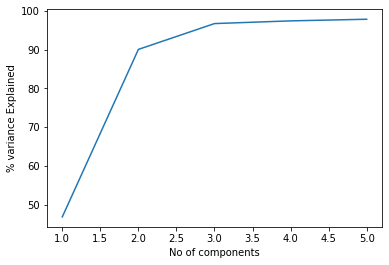

In [82]:
print(var_explained_cumsum)

plt.plot(range(1,6),var_explained_cumsum)
plt.xlabel('No of components')
plt.ylabel("% variance Explained")


In [ ]:
## spliting Target and Predictors variables

X=Fifa19[Predictors].values
y=Fifa19[target].values


In [88]:
## converting all atributes into minmax scale

from sklearn.preprocessing import MinMaxScaler

T_scaler=MinMaxScaler()
P_scaler=MinMaxScaler()

X=P_scaler.fit_transform(X_reduced)
y=T_scaler.fit_transform(y)



In [137]:
##Train And Tet split
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=50)



In [92]:
print(X_train.shape)
print(y_train.shape)

(4472, 5)
(4472, 1)


In [94]:
from keras.models import Sequential
from keras.layers import Dense

In [138]:
## creating Ann

model=Sequential()

model.add(Dense(units=14, input_dim=5, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=11, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [139]:
model.fit(X_train, y_train ,batch_size =10, epochs = 20, verbose=0)

In [140]:
predictions=model.predict(X_test)
Testdatacopy=P_scaler.inverse_transform(X_test)
Testdata=pca.inverse_transform(Testdatacopy)
Testdata_Frame=pd.DataFrame(Testdata, columns=Predictors)
y_origin=T_scaler.inverse_transform(y_test)
Testdata_Frame['values_New']=y_origin
predictionvalues=T_scaler.inverse_transform(predictions)
Testdata_Frame['Predictedvalues']=predictionvalues

In [143]:
APE=100* (abs(Testdata_Frame['values_New']-Testdata_Frame['Predictedvalues'])/Testdata_Frame['values_New'])

Accuracy=100-np.median(APE)

Testdata_Frame['Ape']=APE
print(Accuracy)


36.54471645412502


In [124]:
Testdata_Frame

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,values_New,Predictedvalues
0,20.818260,1.0,1.0,3.0,2.403151,6.553898,4.290159,-3.638258e-20,8.175784,22.124382,...,49.798323,52.092824,51.049642,10.064820,10.154149,9.981856,10.173297,9.906978,250.0,313.669342
1,23.011017,1.0,1.0,3.0,2.659425,5.577787,4.713958,-1.207772e-20,14.644752,20.123908,...,39.773710,38.739596,36.945433,10.293428,10.447611,10.388227,10.391077,10.318313,1.0,301.287445
2,20.705304,1.0,1.0,3.0,2.599384,6.803381,4.195089,-1.753290e-19,9.874859,24.150437,...,35.316393,34.894534,33.303869,9.720348,9.888878,9.810337,9.906410,9.752769,400.0,284.227753
3,26.580154,1.0,1.0,3.0,2.869214,5.178082,5.068095,-8.105475e-20,11.604564,15.731601,...,53.725878,54.643414,51.350236,10.610432,10.777817,10.832888,10.669036,10.757278,1.3,265.535675
4,31.751603,1.0,1.0,3.0,2.877190,4.406094,6.001318,-8.186176e-20,13.447802,9.599803,...,62.951614,64.043366,58.862734,11.123161,11.321406,11.524255,11.263415,11.489804,5.5,268.109253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,24.460560,1.0,1.0,3.0,2.190441,5.409941,5.313119,1.936353e-19,14.364911,15.638542,...,59.282212,60.156508,58.882913,10.766438,10.776759,10.725167,10.787165,10.758764,250.0,340.052277
1913,24.865560,1.0,1.0,3.0,2.705627,5.382021,4.959117,-2.560159e-20,13.425098,17.627043,...,47.615583,47.497014,45.034859,10.480151,10.627559,10.629502,10.557144,10.572702,425.0,288.382996
1914,26.241309,1.0,1.0,3.0,2.443451,5.853625,5.234642,-7.036394e-20,9.727919,15.988156,...,58.311130,60.608500,57.463259,10.532256,10.663371,10.665137,10.735884,10.638318,240.0,308.343872
1915,25.757329,1.0,1.0,3.0,2.659102,5.613127,4.863676,-4.333754e-20,5.740309,15.363462,...,70.160886,75.130975,72.338130,10.687925,10.778670,10.724068,10.705538,10.625620,4.2,281.418610


In [135]:
print(np.min(Testdata_Frame['Predictedvalues']))
print(np.max(Testdata_Frame['Predictedvalues']))

204.0489959716797
406.3279113769531
